In [2]:
import pandas as pd
data=pd.read_csv('../데이터/house_price.csv',encoding='utf-8')

In [4]:
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

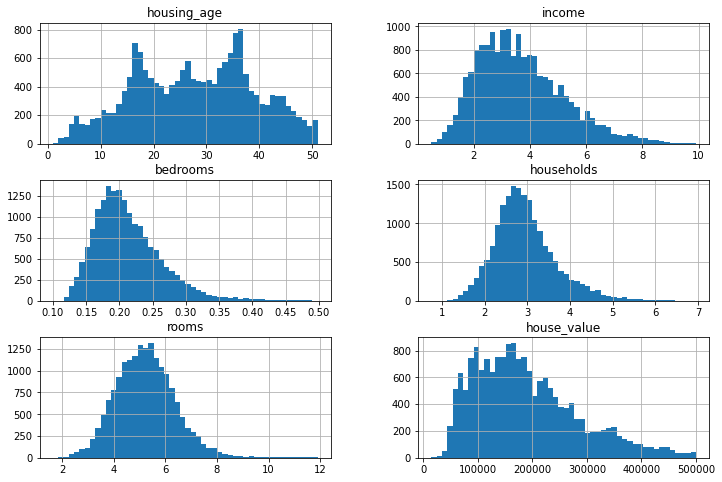

In [5]:
data.hist(bins=50,figsize=(12,8))

In [6]:
X=data[data.columns[0:5]]
y=data[['house_value']]

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=52)

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

scaler_minmax.fit(X_train)
scaler_standard.fit(X_train)

X_scaled_minmax_train=scaler_minmax.transform(X_train)
X_scaled_standard_train=scaler_standard.transform(X_train)

X_scaled_minmax_test=scaler_minmax.transform(X_test)
X_scaled_standard_test=scaler_standard.transform(X_test)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_scaled_minmax_train,y_train)

LinearRegression()

In [13]:
print(model.score(X_scaled_minmax_train,y_train))
print(model.score(X_scaled_minmax_test,y_test))

0.5749416066017271
0.5694364260143878


In [19]:
# 평가지표
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

def MAPE(y_test,y_pred):
    return np.mean(np.abs((y_test-y_pred))).values[0]*100

def MPE(y_test,y_pred):
    return np.mean((y_test-pred_test)/y_test).values[0]*100

pred_test = model.predict(X_scaled_minmax_test)
print('MAE : {}'.format(mean_absolute_error(y_test,pred_test)))
print("MSE : {}".format(mean_squared_error(y_test,pred_test)))
print("RMSE : {}".format(np.sqrt(mean_squared_error(y_test,pred_test))))
print("MAPE : {}".format(MAPE(y_test,pred_test)))
print("MPE : {}".format(MPE(y_test,pred_test)))

MAE : 46163.57594681123
MSE : 3767126522.8617077
RMSE : 61376.921744754414
MAPE : 4616357.594681128
MPE : -13.196961342582073
